# ydata_profilling 演習

## （1）Kaggle-battery-data
- 参考：https://github.com/ydataai/ydata-profiling?tab=readme-ov-file
- dataset:590_Charge11.csv

In [2]:
import numpy as np
import pandas as pd
# from ydata_profiling import ProfileReport

df = pd.read_csv("590_Charge11.csv",skiprows=28)   #ok，原来是csv前面几行有一些设备信息，我skiprows就好了
df = df.drop(index=0).reset_index(drop=True) 
df=df.drop(columns=df.columns[df.columns.str.contains('^Unnamed')], errors='ignore') #去掉尾部多余的一列
# 常见于 to_csv(index=True) 导出的 CSV，再被 read_csv 读回时，就会产生一个 Unnamed: 0 列（它其实是原来的行索引）
df.head(5)

,Time Stamp,Step,Status,Prog Time,Step Time,Cycle,Cycle Level,Procedure,Voltage,Current,Temperature,Capacity,WhAccu,Cnt
0,12/1/2018 4:16:21 PM,3.0,PAU,06:18:29.510,00:01:00.002,0.0,0.0,NN_Char_Charge,3.41208,0.00000,1.15674,0.00000,0.00000,2.00000
1,12/1/2018 4:17:21 PM,3.0,PAU,06:19:29.508,00:02:00.000,0.0,0.0,NN_Char_Charge,3.41242,0.00000,4.31150,0.00000,0.00000,2.00000
2,12/1/2018 4:18:21 PM,3.0,PAU,06:20:29.510,00:03:00.002,0.0,0.0,NN_Char_Charge,3.41259,0.00000,7.88689,0.00000,0.00000,2.00000
3,12/1/2018 4:19:21 PM,3.0,PAU,06:21:29.507,00:03:59.999,0.0,0.0,NN_Char_Charge,3.41242,0.00000,11.35712,0.00000,0.00000,2.00000
4,12/1/2018 4:20:21 PM,3.0,PAU,06:22:29.509,00:05:00.001,0.0,0.0,NN_Char_Charge,3.41208,0.00000,14.82735,0.00000,0.00000,2.00000


In [26]:
profile = ProfileReport(df, title="Profiling Report")

In [5]:
# profile.to_notebook_iframe() 


这个 dataset 好像...不太适合做时序数据的处理诶？诶？还是说我还没有用到某些功能。

matlab的rawdata，没有accumulate capacity计算，所以图图看起来...有点怪怪的？(・◇・)？

要是做那种多变量分析的话...还不如直接用JMP

(☝ ՞ਊ ՞）☝


## (2)Sensor-Time-series-data
- 参考：https://docs.profiling.ydata.ai/latest/features/time_series_datasets/
- dataset: P2_2025-07-05.csv

- ydata-profiling can be used for a quick Exploratory Data Analysis on time-series data. This is useful for a quick understanding on the behaviour of time dependent variables regarding behaviours such as time plots, seasonality, trends, stationary and data gaps. 
- Combined with the profiling reports compare, you're able to compare the evolution and data behaviour through time, in terms of time-series specific statistics such as PACF and ACF plots. It also provides the identification of gaps in the time series, caused either by missing values or by entries missing in the time index.


In [ ]:
# The following syntax can be used to generate a profile under the assumption that the dataset includes time dependent features:
#这份公开数据集是美国 2000‑2016 年空气污染观测（EPA AQS），含日期、经纬度、污染物浓度等。

In [1]:
# import pandas as pd

# from ydata_profiling.utils.cache import cache_file
# from ydata_profiling import ProfileReport

# file_name = cache_file(
#     "pollution_us_2000_2016.csv",
#     "https://query.data.world/s/mz5ot3l4zrgvldncfgxu34nda45kvb",
# )
# # ydata‑profiling 自带的 小型文件缓存器。第一次运行会把远端文件下载到本地临时目录；以后再调同样名字就直接用本地副本。

# df = pd.read_csv(file_name, index_col=[0])      # index_col=[0]：把第 0 列当索引（行标签）——必须确认第 0 列真的是时间/唯一键，否则索引就乱了
# # Filtering time-series to profile a single site
# site = df[df["Site Num"] == 3003]               # 这里取 站点 3003 的全部记录，得到 site 子表（通常做单站点时序分析）。
# #Enable tsmode to True to automatically identify time-series variables
# #Provide the column name that provides the chronological order of your time-series

# profile = ProfileReport(
#     df, 
#     tsmode=True,   # 启用“时序模式” ① 自动识别 DatetimeIndex 或 datetime 列 ② 额外生成时序版块：趋势、季节性、平稳性检验、ACF/PACF、缺口检测等。
#     sortby="Date Local",   # 指定哪个列是“时间轴”，报告会先排序再分析。若 Date Local 不是 datetime 类型，内部会先 pd.to_datetime()
#     title="Time-Series EDA")

# profile.to_file("report_timeseries.html")

| 目标                          | 代码/说明                                                                                                                                                  |
| --------------------------- | ------------------------------------------------------------------------------------------------------------------------------------------------------ |
| **只分析某个污染物列**（如 `NO2 Mean`） | `ProfileReport(site[['NO2 Mean']], tsmode=True, sortby="Date Local")`                                                                                  |
| **采样加速**（行太多）               | `site.sample(n=100_000, random_state=0)` + `minimal=True`                                                                                              |
| **对比两个时段**                  | `pr1 = ProfileReport(site.loc[:'2010'], tsmode=True, sortby="Date Local"); pr2 = ProfileReport(site.loc['2015':], ...); pr1.compare(pr2).to_file(...)` |
| **处理非规整间隔**                 | 先 `site = site.set_index('Date Local').asfreq('1D')` 把缺口显式化，更易发现 gap。                                                                                  |


omg这个示例dataset何方神圣给我干了5min才把代码跑完(*´ο`*)

看了一下csv文件400,946,718 bytes (402.7 MB on disk) (ღ˘⌣˘ღ) 怪不得

来试一下 P2_2025-07-05.csv

In [8]:
import pandas as pd
from ydata_profiling import ProfileReport
df = pd.read_csv("P2_2025-07-05.csv",
                #  ,index_col=0
                parse_dates=["timestamp"]
                 ) 
# df.index.name = "timestamp" 
df.head(5)

,timestamp,device_id,temperature,humidity,pressure,gas_resistance,co2,absolute_humidity
0,2025-07-05 09:48:43,P2,27.32004,58.52402,998.3854,25036,565.0,15.33
1,2025-07-05 09:49:13,P2,27.95168,58.31137,998.3972,44352,568.0,15.82
2,2025-07-05 09:49:44,P2,28.36125,58.04615,998.4022,60339,569.0,16.10
3,2025-07-05 09:50:14,P2,28.54563,57.84314,998.4022,72213,572.0,16.21
4,2025-07-05 09:50:44,P2,28.66672,57.65001,998.3962,81609,573.0,16.26


In [9]:
profile = ProfileReport(
    df, 
    tsmode=True,  
    sortby="timestamp",  
    title="Time-Series Sensor EDA")
profile.to_file("output2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:00<00:00, 55.26it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

well done!(。-ω-)ﾉ
So this is the MVP for humidity sensor data, if we can have csc file stored on a daily base, we can produce daily html report so that we don't have to access to the port wifi.=’①。①’=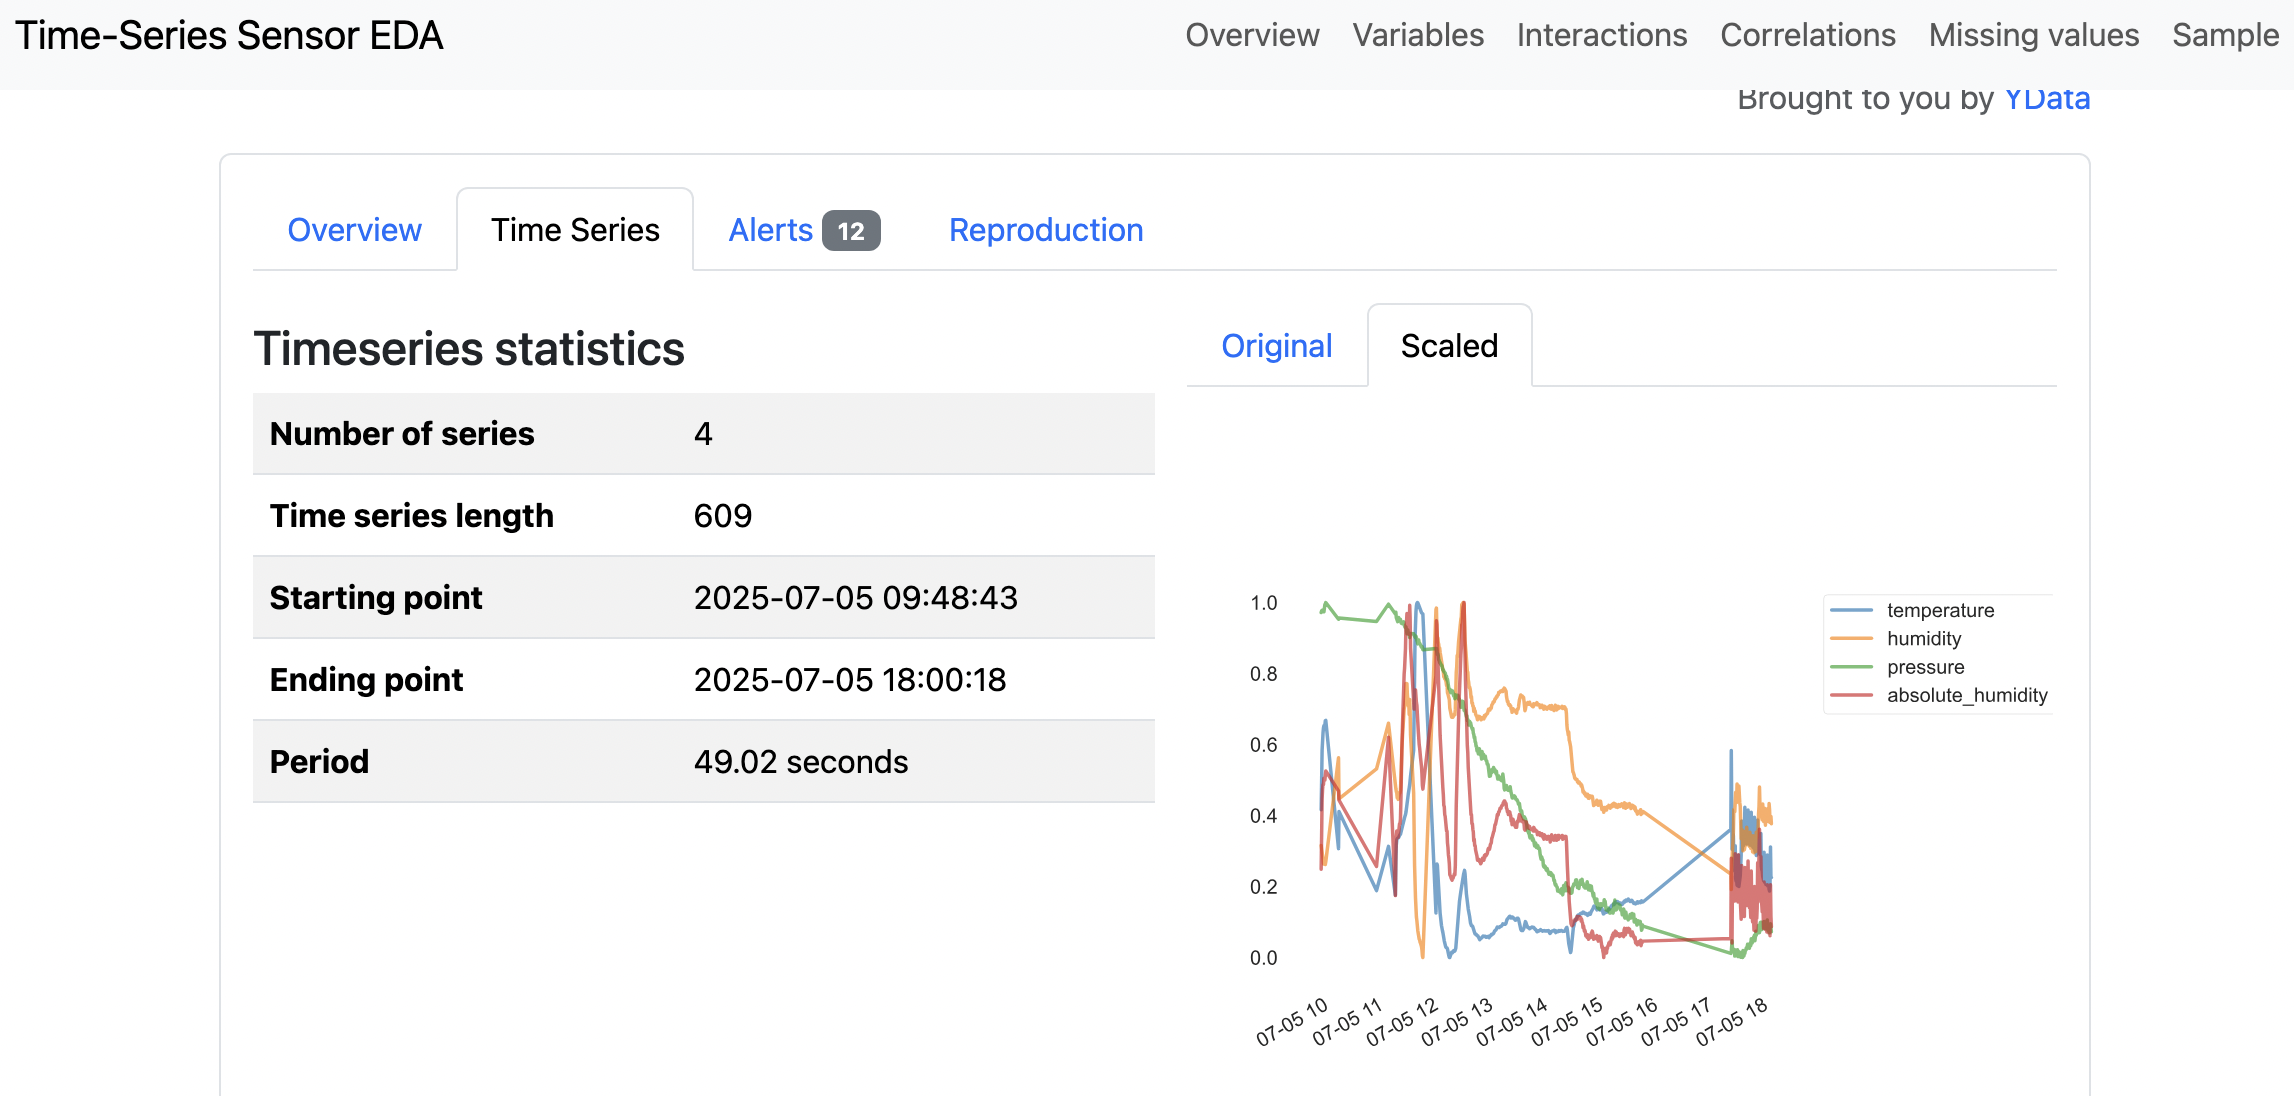

## Why use ydata-profiling?
ydata-profiling is a valuable tool for data scientists and analysts because it streamlines EDA, provides comprehensive insights, enhances data quality, and promotes data science best practices.

Simple to user: It is so simple to use - a single line of code is what you need to get you started. Do you really need more to convince you? 😛
```
import pandas as pd
from ydata_profiling import ProfileReport

df = pd.read_csv('data.csv')
profile = ProfileReport(df, title="Profiling Report")
```
Comprehensive insights in a report: a report including a wide range of statistics and visualizations, providing a holistic view of your data. The report is shareable as a html file or while integrate as a widget in a Jupyter Notebook.
Data quality assessment: excel at the identification of missing data, duplicate entries and outliers. These insights are essential for data cleaning and preparation, ensuring the reliability of your analysis and leading to early problems' identification.
Ease of integration with other flows: all metrics of the data profiling can be consumed in a standard JSON format.
Data exploration for large datasets: even with dataset with a large number of rows, ydata-profiling will be able to help you as it supports both Pandas Dataframes and Spark Dataframes.
- 数据质量评估：擅长识别缺失数据、重复条目和异常值。这些洞察对于数据清理和准备至关重要，可确保分析的可靠性并有助于及早发现问题。
- 易于与其他流程集成：数据分析的所有指标均可采用标准 JSON 格式。

## (3)Customizing the report
In some situations, a user might want to customize the appearance of the report to match personal preferences or a corporate brand. ydata-profiling offers two major customization dimensions: the styling of the HTML report and the styling of the visualizations and plots contained within.